Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: nan
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: nan
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: nan
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: nan
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: nan
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: nan
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: nan
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: nan
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: nan
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: nan
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: nan
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: nan
Epoch 13/200
4/4 [==============================] - 0s 4ms/step - loss: nan
Epoch 14/200
4/4 [===

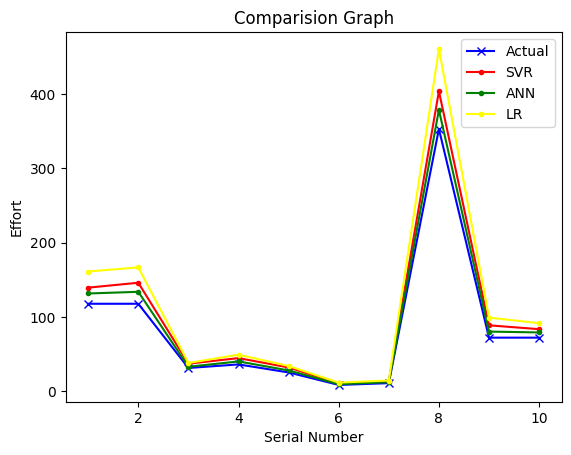

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import ann,svr,lr

# Load COCOMO II database

data = pd.read_csv('/content/sample_data/data.csv')
data['Serial'] = data['RecordNumber'] 
data = data.drop(['RecordNumber','Model'],axis=1)

data['Serial'] = pd.to_numeric(data['Serial'], errors='coerce')
data = data[data.applymap(lambda x: isinstance(x, (int, float)))]

data = ann.ann_model(data)
print(data['ANN'])
# Split the data into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

data = svr.svr_model(data)
data = lr.lr_model(data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define the model architecture
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=200)

# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss:', score)

# Predict software cost for new projects
new_project = np.array([[-0.44204216, -2.42255351, -2.55424661, -2.70477068, -1.69008545,
        0.50725698, -0.6948331 , -1.21520408, -0.13838004,  0.23712054,
       -0.66130351, -0.62853795, -0.56027327, -0.26322056, -0.53283175,
       -0.01710304, -0.58567822, -0.06521227, -0.6324199 ,  0.73268662,
       -0.7162225 ,  0.31948483, -1.96359657]])
df_required = data.loc[:, ["Serial","ACT_EFFORT","LR","SVR","ANN"]]
# new_project_scaled = sc.transform(new_project)
# predicted_cost = model.predict(new_project_scaled)
print(df_required[:10])
df_required = df_required[:10]
plt.plot(df_required['Serial'], df_required['ACT_EFFORT'],**{'color': 'blue', 'marker': 'x'}, label='Actual')
plt.plot(df_required['Serial'], df_required['SVR'],**{'color': 'red', 'marker': '.'}, label='SVR')
plt.plot(df_required['Serial'], df_required['ANN'],**{'color': 'green', 'marker': '.'}, label='ANN')
plt.plot(df_required['Serial'], df_required['LR'],**{'color': 'yellow', 'marker': '.'}, label='LR')

# Add a title and axis labels
plt.title('Comparision Graph')
plt.xlabel('Serial Number')
plt.ylabel('Effort')

# Add a legend
plt.legend()

# Display the graph
plt.show()